Axel Piasecki

Mamadou Billo Dillo

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import time


In [ ]:
data=pd.read_csv("DonneesSleep.csv",na_values="",sep=";")

Ce dataset provient de Kaggle, le but est de ce dataset est de prédire si les personnes ont un sommeil de qualité avec une note de 0 à 1.
Explication des variables :
Age : age de la personne en année
Gender : genre
Bedtime : heure de couché
Wakeup time : heure de levé
Sleep duration : temps de sommeil
REM sleep percentage : pourcentage de temps passé en sommeil paradoxale
Deep sleep percentage : pourcentage de temps passé en sommeil profond
Light sleep percentage : Pourcentage de temps passé en sommeil léger
Awakenings : Nombre de réveil
Caffeine consumption : Quanité de cafféine consommé en mg dans les 24 heures précédent le coucher
Alcohol consumption : Quanité d'alcool consommé en oz dans les 24 heures précédent le coucher
Smoking status : est-ce que la personne fume ?
Exercice frequency : nombre de fois par semaine que la personne fait du sport

In [ ]:
data.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,06/03/2021 01:00,06/03/2021 07:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,05/12/2021 02:00,05/12/2021 09:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,25/05/2021 21:30,25/05/2021 05:30,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,03/11/2021 02:30,03/11/2021 08:30,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,13/03/2021 01:00,13/03/2021 09:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


Pour des raisons pratique nous allons supprimer les variables "Bedtime" et Wakeup time. Nous allons aussi supprimer la variable ID qui est inutile.

In [ ]:
data=data.drop(["Bedtime","Wakeup time","ID"],axis=1)

In [ ]:
data.describe(include=np.number)

,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


On va regarder les valeurs manquantes

In [ ]:
data.isna().sum()

Age                        0
Gender                     0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [ ]:
data.dtypes

Age                         int64
Gender                     object
Sleep duration            float64
Sleep efficiency          float64
REM sleep percentage        int64
Deep sleep percentage       int64
Light sleep percentage      int64
Awakenings                float64
Caffeine consumption      float64
Alcohol consumption       float64
Smoking status             object
Exercise frequency        float64
dtype: object

In [ ]:
#sépration des données en jeu d'entrainement et de test
train_set,test_set=train_test_split(data, test_size=0.2, random_state=42)

On va maintenant regarder à quoi resemble graphiquement les variables numérique

In [ ]:
data_num=train_set.drop(["Gender","Smoking status"],axis=1)

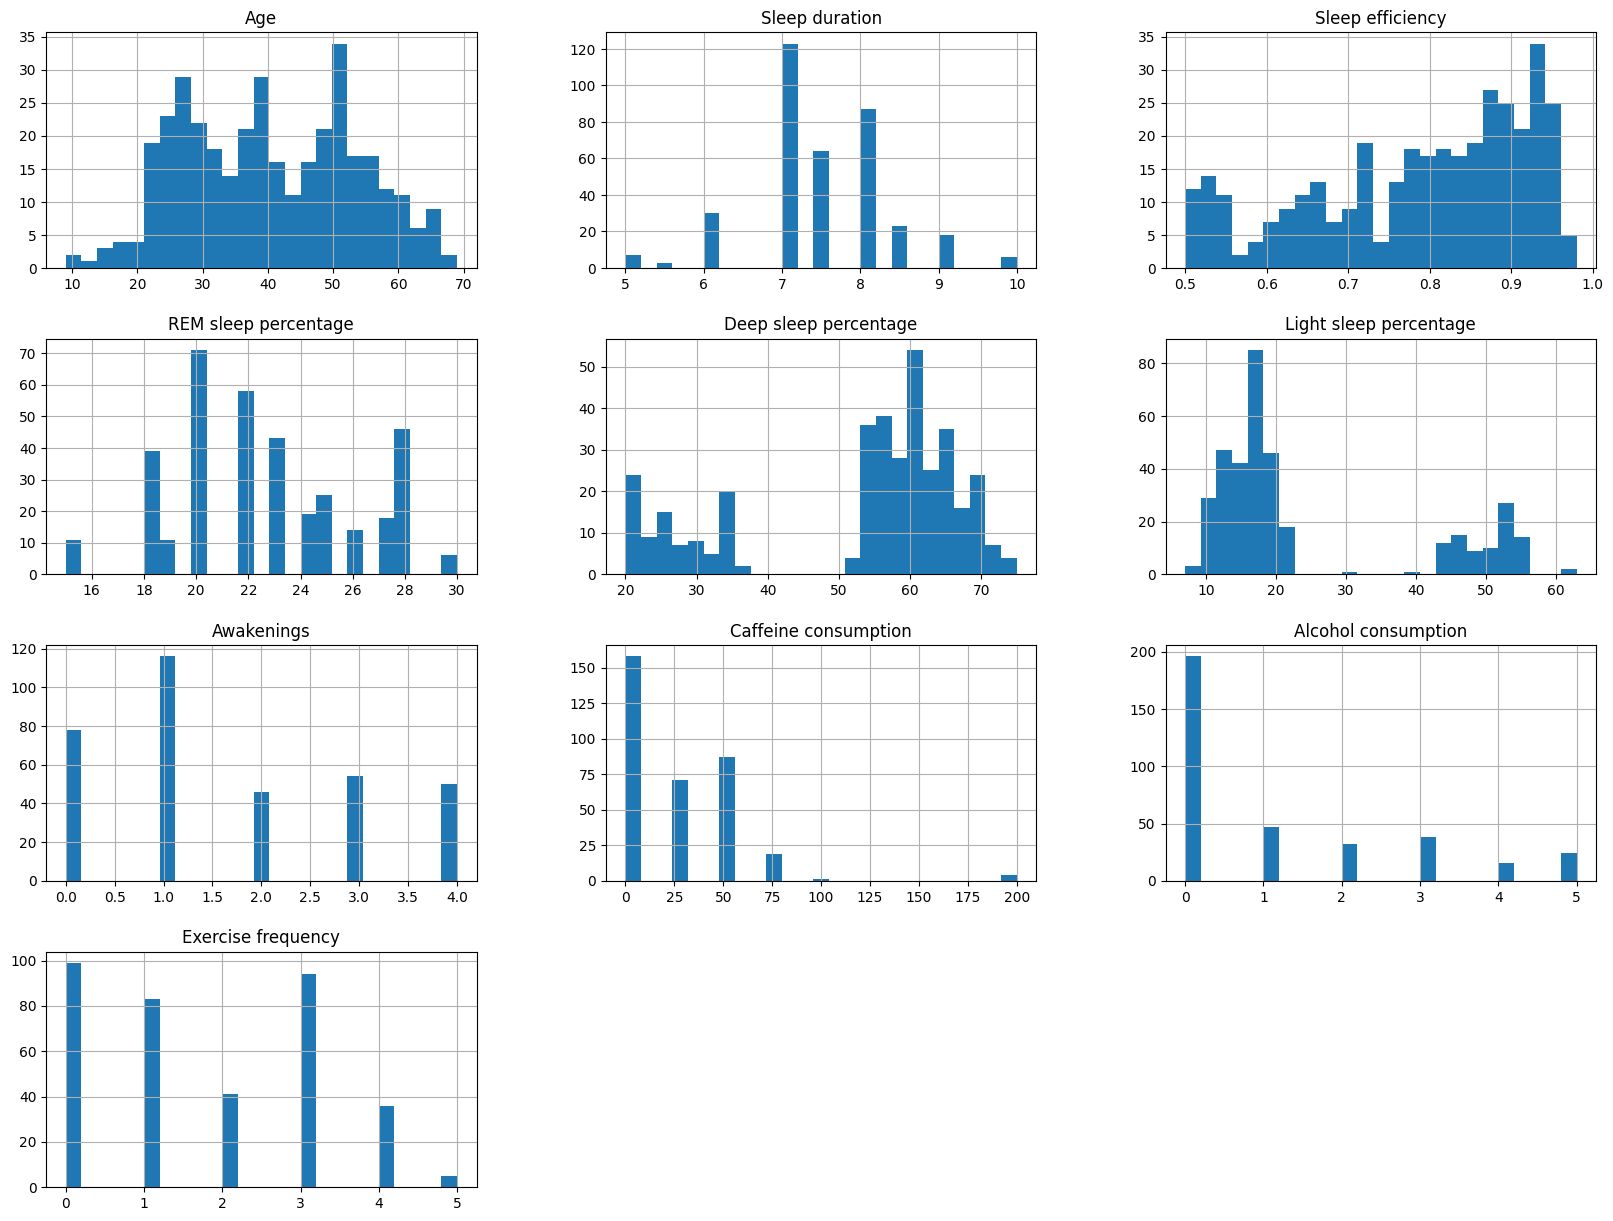

In [ ]:
data_num.hist(bins=25, figsize=(20,15))
plt.show()

On remarque les variables ne sont pas toutes des variables continues certaines d'entre elles sont discrètes tel que :
-Awakenings
- Cafeine consumption
- Alcohol consumption
- Exercise frequency

In [ ]:
corr_matrix =data_num.corr()

In [ ]:
corr_matrix['Sleep efficiency'].sort_values(ascending=False)

Sleep efficiency          1.000000
Deep sleep percentage     0.792851
Exercise frequency        0.256582
Age                       0.075646
Caffeine consumption      0.066209
REM sleep percentage      0.045994
Sleep duration           -0.008654
Alcohol consumption      -0.381501
Awakenings               -0.568800
Light sleep percentage   -0.817449
Name: Sleep efficiency, dtype: float64

On remarque la variable cible est très corrélé positivement avec la variable deep sleep percentage et est bien corrélé négativement avec la variable light sleep percentage.

Fonction de netoyage des outliers

In [ ]:
def nettoyageOutliers(df: pd.DataFrame) -> pd.DataFrame:
    cols = df.columns
    Q25 = df[cols].quantile(0.25) #Q1 on définit le premier quartile pour c
    Q75 = df[cols].quantile(0.75)
    IQR = Q75 - Q25
    SeuilMin = (Q25 - 1.5 * IQR)
    SeuilMax= (Q75 + 1.5 * IQR)
    nouv_df = df[cols].clip(SeuilMin[cols], SeuilMax[cols], axis=1)
    return nouv_df

In [ ]:
def bornage(data):
    return nettoyageOutliers(pd.DataFrame(data))

In [ ]:
# Définition du pipeline pour les variables numériques
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('valeur_extreme', FunctionTransformer(bornage, validate=False))
])

# Définition du pipeline pour les variables catégoriques
cat_transformer = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

# Création du pipeline complet avec ColumnTransformer
full_pipeline = ColumnTransformer(
    transformers=[
        ('num', num_transformer, make_column_selector(dtype_include=np.number)),
        ('cat', cat_transformer, make_column_selector(dtype_exclude=np.number))
    ]
)


In [ ]:
X_train = train_set.drop(["Sleep efficiency"], axis=1)
y_train = train_set['Sleep efficiency']

Application de la pipeline sur le jeu d'entrainement

In [ ]:
X_train=full_pipeline.fit_transform(X_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mise en place de l'algorithme Xgboost

XGBoost est un algorithme de boosting qui combine plusieurs modèles d'arbres de décision. Il utilise une approche itérative pour former des arbres successifs, corrigeant les erreurs des modèles précédents. En optimisant une fonction de perte, XGBoost cherche à minimiser les écarts entre les prédictions et les valeurs réelles. Ainsi XGBoost parvient à produire des modèles puissants et généralisables.

In [ ]:
model = xgb.XGBRegressor()

#Définition par validation croisé
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
start_time=time.time()
# Effectuer la validation croisée
scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
execution_time=time.time()-start_time
print("Temps entrainement validation croisés", execution_time)
# Afficher les scores de validation croisée
print("Mean squadred error", -scores)
print("Mean Squared Error (Cross-validated):", -scores.mean())

Temps entrainement validation croisés 0.2256169319152832
Mean squadred error [0.00385739 0.0035752  0.00245973 0.00234999 0.00403266]
Mean Squared Error (Cross-validated): 0.003254993667633324


Avec le Xgboost on obtient par la validation croisée une  erreur quadratique moyenne de seulement 0.003. Ce qui est très intérressant. On va optimiser les paramètres afin d'avoir de résultat encore meilleurs

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train,y_train)
results = pd.DataFrame(grid_search.cv_results_)
best_params = grid_search.best_params_
best_index = np.argmax(grid_search.cv_results_['mean_test_score'])
print("Meilleurs paramètres:")
print(grid_search.cv_results_['params'][best_index])
print("MSE moyen:", -grid_search.cv_results_['mean_test_score'][best_index])


Meilleurs paramètres:
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
MSE moyen: 0.0025453506576562394


Avec des paramètres optimiser on est passé à une MSE de 0.002

In [ ]:
best_model_xgboost=grid_search.best_estimator_

In [ ]:
X_test = test_set.drop(["Sleep efficiency"], axis=1)
y_test= test_set['Sleep efficiency']

Application de la pipeline

In [ ]:
X_test=full_pipeline.fit_transform(X_test)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
predicitons=best_model_xgboost.predict(X_test)
mse=mean_squared_error(y_test,predicitons)
print(mse)

0.002444525526666421


Avec Xgboost on obtient une erreur quadratique moyenne de 0.002, ce qui est fait que notre modèle arrive vraiment bien à prédire la qualité du sommeil avec ces variables cibles.

Random forest

In [ ]:
# Créer un RandomForestRegressor
rdf_regressor = RandomForestRegressor(criterion='squared_error', random_state=42, n_jobs=-1)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
start_time=time.time()
# Entraîner le RandomForestRegressor sur l'ensemble d'entraînement
scores = cross_val_score(rdf_regressor, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

training_time_foret=time.time()-start_time
print("Temps entrainement validation croisés", training_time_foret)
# Afficher les scores de validation croisée
print("Mean squadred error", -scores)
print("Mean Squared Error (Cross-validated):", -scores.mean())

Temps entrainement validation croisés 0.4609248638153076
Mean squadred error [0.00272939 0.00300509 0.00217057 0.00205197 0.00352005]
Mean Squared Error (Cross-validated): 0.0026954138592085253


In [ ]:



# Définir la grille des hyperparamètres à rechercher
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
}

# Créer un objet GridSearchCV avec validation croisée k-fold
grid_search = GridSearchCV(estimator=rdf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Exécuter la recherche sur grille sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Obtenir le meilleur estimateur
best_estimator = grid_search.best_estimator_

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres trouvés:")
print(grid_search.best_params_)

# Afficher le meilleur score
print("Meilleur score (MSE) :", -grid_search.best_score_)  # Negate the score because GridSearchCV returns negative MSE

# Évaluer le modèle avec la validation croisée k-fold
k_fold_scores = cross_val_score(best_estimator, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Scores de validation croisée k-fold :", -k_fold_scores)  # Negate the scores because cross_val_score returns negative MSE
print("Moyenne des scores de validation croisée :", -k_fold_scores.mean())  # Negate the mean as well

# Prédire sur l'ensemble de test avec le meilleur estimateur
y_pred = best_estimator.predict(X_test)

# Calculer l'erreur quadratique moyenne (MSE) sur l'ensemble de test
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) sur l'ensemble de test :", mse)

Meilleurs hyperparamètres trouvés:
{'max_depth': None, 'n_estimators': 300}
Meilleur score (MSE) : 0.0027531882482665273
Scores de validation croisée k-fold : [0.00220265 0.0019393  0.0025875  0.00375559 0.0032809 ]
Moyenne des scores de validation croisée : 0.0027531882482665277
Mean Squared Error (MSE) sur l'ensemble de test : 0.0025490783028082904


Comparaison des deux modèles

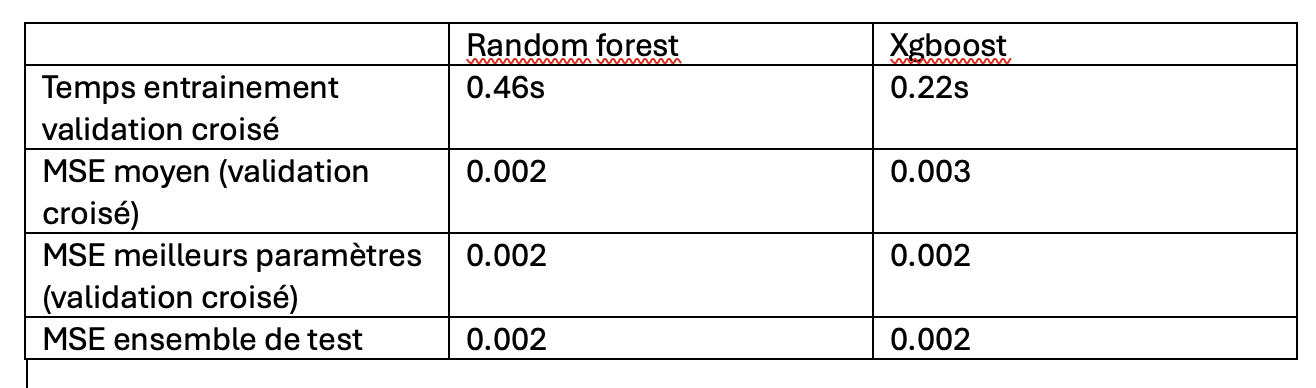